<a href="https://colab.research.google.com/github/Jed-77/tensorflow-deeplearning/blob/master/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network to recognize clothing from the Fashion MNIST dataset. It is also an introduction to using the functional API for building keras models. Enjoy!

In [0]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
# Hyper-parameters
IMAGE_SCALE = 255.0

In [0]:
# Load in the data. 
# Also we will normalise the values from 0->255 to 0->1
f_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = f_mnist.load_data()
x_train, x_test = x_train/IMAGE_SCALE, x_test/IMAGE_SCALE
print("x_train shape: ", x_train.shape)
n_train, image_size_x, image_size_y = x_train.shape
print("y_train shape: ", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


In [0]:
# Data is only 2D - but convolution expects height x width x colour
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
# Number of classes (e.g. trousers, shoes etc...)
K = len(set(y_train))
print("Number of Classes: ", K)

Number of Classes:  10


In [0]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Look at some diagrams of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

In [0]:
# Compile the model and fit (use the GPU!)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5282 - accuracy: 0.8041 - val_loss: 0.4169 - val_accuracy: 0.8439
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3714 - accuracy: 0.8607 - val_loss: 0.3488 - val_accuracy: 0.8738
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3197 - accuracy: 0.8790 - val_loss: 0.3281 - val_accuracy: 0.8790
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2849 - accuracy: 0.8931 - val_loss: 0.3029 - val_accuracy: 0.8866
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2588 - accuracy: 0.9021 - val_loss: 0.3043 - val_accuracy: 0.8902
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2360 - accuracy: 0.9098 - val_loss: 0.3000 - val_accuracy: 0.8921
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2208 - accuracy: 0.9161 - val_loss: 0.2899 -

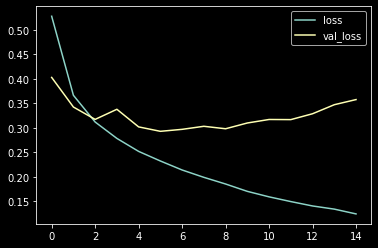

In [0]:
# Plot the loss
from matplotlib import style
style.use('dark_background')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

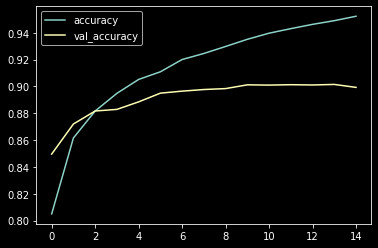

In [0]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Non-normalised Confusion Matrix
[[855   1  25  19   6   1  81   0  12   0]
 [  1 978   1   9   5   0   4   0   2   0]
 [ 13   0 857   9  72   0  47   0   2   0]
 [ 20   5  16 874  46   1  34   0   4   0]
 [  0   1  53  11 882   1  47   0   5   0]
 [  0   0   0   0   0 971   1  17   1  10]
 [108   0  70  23 124   1 665   0   9   0]
 [  0   0   0   0   0  12   0 980   0   8]
 [  2   0   4   1   4   4   8   3 972   2]
 [  1   0   0   0   0   9   0  54   2 934]]


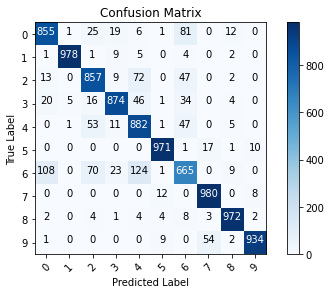

In [0]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalise=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  """
  if normalise:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised Confusion Matrix.")
  else:
    print("Non-normalised Confusion Matrix")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalise else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


# run this
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# Labels
labels = '''T-shirt
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankleboot'''.split()

Text(0.5, 1.0, 'True: Coat, Predicted: Shirt')

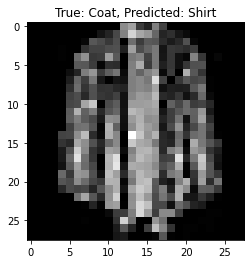

In [0]:
# Show some of the misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True: {}, Predicted: {}".format(labels[y_test[i]], labels[p_test[i]]))

In [0]:
# delete this
class Practise:
  def __init__(self):
    self.a=0
  def __call__(self):
    print("CALLED")

a = Practise()
print(a.a)
a()

0
CALLED
